### Computer Vision

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

sns.set(style='white', context='notebook', palette='deep')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.2.0-rc3
tf.keras.__version__ is: 2.3.0-tf


### Read the data

In [0]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

### Unique values of train labels

In [4]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Visualize image from each category

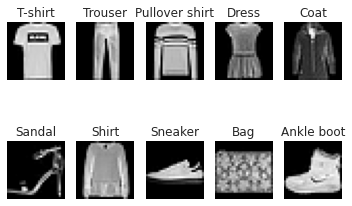

In [5]:
categories = ["T-shirt","Trouser","Pullover shirt","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

each_cat_cloth = []
for label in np.unique(Y_train):
  for i in range(len(Y_train)):
      if Y_train[i] == label:
        each_cat_cloth.append(X_train[i])
        break
      else:
        pass


rows = 2
cols = 5
k = 0
fig, axs = plt.subplots(rows, cols)
for i in range(rows):
  for j in range(cols):
    axs[i,j].imshow(each_cat_cloth[k],cmap="gray")
    axs[i,j].axis('off')
    axs[i,j].set_title(categories[k])
    k = k + 1

In [0]:
#fig.savefig('each_category.png')

### Check the counts for each categories

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


([<matplotlib.axis.XTick at 0x7f3eeb8cd5c0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9')])

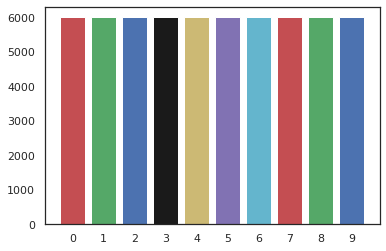

In [6]:
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
plt.bar(unique_elements, counts_elements, width=0.8, color = 'rgbkymc')
plt.xticks(unique_elements, (0,1,2,3,4,5,6,7,8,9))


In [7]:
print("Label of 5 th training data:",Y_train[5])
print("Label of 67 th training data:",Y_train[62])

Label of 5 th training data: 2
Label of 67 th training data: 5


### Convert the labels to one hot vectors


In [0]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [9]:
print("Label of 5 th training data:",Y_train[5])
print("Label of 67 th training data:",Y_train[62])

Label of 5 th training data: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Label of 67 th training data: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Normalize the data

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train = (X_train - np.mean(X_train))/np.std(X_train)

X_train /= 255
X_test /= 255

In [11]:
print("Shape of a input before reshaping:",X_train[0].shape)

Shape of a input before reshaping: (28, 28)


### Reshape image 

In [0]:
# Reshape image in 3 dimensions(height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [13]:
print("Shape of a input after reshaping:",X_train[0].shape)

Shape of a input after reshaping: (28, 28, 1)


### Visualize an image with reshaped Data

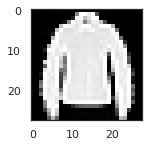

In [15]:
plt.figure(figsize=(2,4))
plt.imshow(X_train[502][:,:,0],cmap = "gray")

### Define our Model

In [0]:
# CNN model 

def cnn_model():

  model = Sequential()

  model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', strides=(1,1),
                  activation ='relu', input_shape = (28,28,1)))

  #model.add(BatchNormalization(axis=1))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))


  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', strides=(1,1),
                  activation ='relu'))
  #model.add(BatchNormalization(axis=1))

  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))


  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  #model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(10, activation = "softmax"))

  # Define the optimizer
  #optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
  optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

  # Compile the model
  model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

  return model


In [0]:
model = cnn_model()

### Model Summary

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

#### Fit and evaluate model

In [0]:
def fit_model(model,epochs = 50, batch_size = 512, data_augmentation = False):

    if not data_augmentation:
      print("Fitting model without using Data Augmenatation.")
      history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, Y_test),
              shuffle=True, verbose = 2)
    else:
      print("Fitting model using Data Augmenatation.")
      datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=True,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None)
      
      datagen.fit(X_train)
      history = model.fit_generator(datagen.flow(X_train, Y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(X_test, Y_test),
                        shuffle = True,verbose = 2)
    return history

### Fitting model without Data Augmentation

In [20]:
history = fit_model(model,data_augmentation =False)

Fitting model without using Data Augmenatation.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 0.7918 - accuracy: 0.7050 - val_loss: 0.4690 - val_accuracy: 0.8288
Epoch 2/50
 - 3s - loss: 0.4700 - accuracy: 0.8289 - val_loss: 0.3906 - val_accuracy: 0.8574
Epoch 3/50
 - 3s - loss: 0.4048 - accuracy: 0.8546 - val_loss: 0.3538 - val_accuracy: 0.8727
Epoch 4/50
 - 3s - loss: 0.3716 - accuracy: 0.8654 - val_loss: 0.3301 - val_accuracy: 0.8798
Epoch 5/50
 - 3s - loss: 0.3480 - accuracy: 0.8743 - val_loss: 0.3098 - val_accuracy: 0.8858
Epoch 6/50
 - 3s - loss: 0.3275 - accuracy: 0.8809 - val_loss: 0.2956 - val_accuracy: 0.8919
Epoch 7/50
 - 3s - loss: 0.3138 - accuracy: 0.8853 - val_loss: 0.2881 - val_accuracy: 0.8956
Epoch 8/50
 - 3s - loss: 0.3024 - accuracy: 0.8894 - val_loss: 0.2782 - val_accuracy: 0.8968
Epoch 9/50
 - 3s - loss: 0.2907 - accuracy: 0.8935 - val_loss: 0.2693 - val_accuracy: 0.8998
Epoch 10/50
 - 3s - loss: 0.2807 - accuracy: 0.8983 - val_loss: 0

### With Data Augmentation

In [42]:
model_2 = cnn_model()
history_2 = fit_model(model_2,data_augmentation =True)

Fitting model using Data Augmenatation.
Epoch 1/50
 - 11s - loss: 0.9360 - accuracy: 0.6499 - val_loss: 0.5455 - val_accuracy: 0.7879
Epoch 2/50
 - 11s - loss: 0.6326 - accuracy: 0.7615 - val_loss: 0.4713 - val_accuracy: 0.8209
Epoch 3/50
 - 11s - loss: 0.5554 - accuracy: 0.7904 - val_loss: 0.4270 - val_accuracy: 0.8417
Epoch 4/50
 - 11s - loss: 0.5180 - accuracy: 0.8076 - val_loss: 0.3941 - val_accuracy: 0.8523
Epoch 5/50
 - 11s - loss: 0.4895 - accuracy: 0.8166 - val_loss: 0.3687 - val_accuracy: 0.8659
Epoch 6/50
 - 11s - loss: 0.4683 - accuracy: 0.8259 - val_loss: 0.3570 - val_accuracy: 0.8672
Epoch 7/50
 - 11s - loss: 0.4488 - accuracy: 0.8324 - val_loss: 0.3455 - val_accuracy: 0.8707
Epoch 8/50
 - 11s - loss: 0.4362 - accuracy: 0.8370 - val_loss: 0.3386 - val_accuracy: 0.8751
Epoch 9/50
 - 11s - loss: 0.4250 - accuracy: 0.8414 - val_loss: 0.3161 - val_accuracy: 0.8820
Epoch 10/50
 - 11s - loss: 0.4134 - accuracy: 0.8476 - val_loss: 0.3133 - val_accuracy: 0.8849
Epoch 11/50
 - 11s 

##### In this case Data Augmentation didn't help much.

### Accuracy and loss on test data

In [43]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.20408273931592702
Test accuracy: 0.9304999709129333


### Results for the test data

In [22]:
Y_pred = model.predict(X_test)
# Convert the output to a label by taking the index of max probability
Y_pred_class = np.argmax(Y_pred,axis = 1) 
print("Predicted label for 500 th test data:",categories[Y_pred_class[499]])

Predicted label for 500 th test data: T-shirt


### Plotting the training & test loss and accuracy

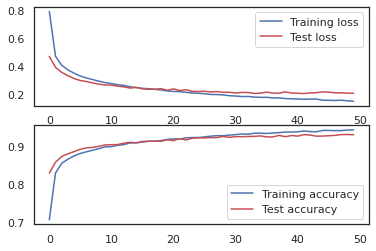

In [46]:
# Plot the loss and accuracy curves for training and test
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Test loss",axes =ax[0])
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Test accuracy")
legend = ax[1].legend(loc='best')

In [0]:
fig.savefig('acc_loss_plot.png')


### Confusion Matrix for the test data

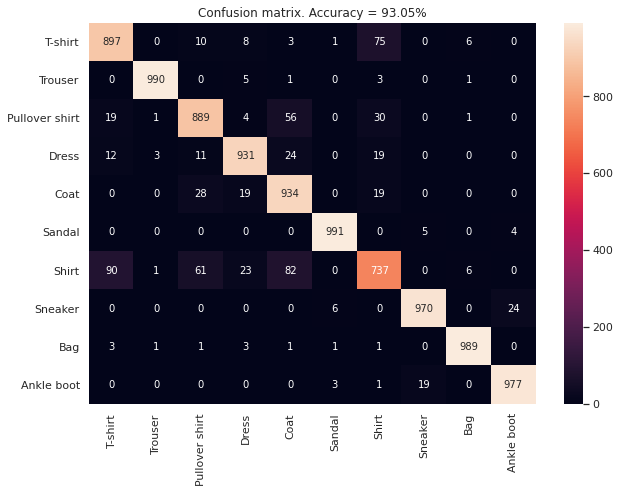

In [36]:
# Predicted values of test dataset
Y_pred = model.predict(X_test)
# Convert the output to a label by taking the index of max probability
Y_pred_class = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_test,axis = 1) 

## Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_class)
acc = np.sum(np.diag(cm))/10000
df_cm = pd.DataFrame(cm, index = [i for i in categories],
                  columns = [i for i in categories])
plt.figure(figsize = (10,7))
plt.title('Confusion matrix. Accuracy = {:4.2f}%'.format(acc*100))

sns_plot = sn.heatmap(df_cm, annot=True,fmt="d")
#plt.imshow(cm, interpolation='nearest')

plt.show()


In [0]:
fig = sns_plot.get_figure()
fig.savefig("confusion_mat.png")